In [1]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.preprocessing import normalize #machine learning algorithm library
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout, LSTM
from keras.utils.vis_utils import plot_model
import math
from sklearn.metrics import r2_score

In [3]:
# #Reading data 
step=5
num_input=4
output_cluster=5 #output cluster
num_output=1 #numb of output
num_var=num_input+num_output

data=pd.read_csv("traffic.csv")
col_names=list(data)[0:5]
num_line = len(data.index)

# convert an array of values into a dataset matrix
for i in range(num_line-step):
    data.iloc[i,4]=data.iloc[i+step,1]

for i in range(step):
    data = data.drop(num_line-1)
    num_line=num_line-1
    
data_test=data
test_num_line = len(data_test.index)
data_train=data
train_num_line=len(data_train.index)
data_train

,time,lane 1,lane 2,lane 3,output
0,0.6806,0.4144,0.5124,0.3425,2.0608
1,0.6840,1.8717,1.4981,1.6181,1.9945
2,0.6875,1.6749,1.2135,1.4810,1.9118
3,0.6910,1.8391,1.2800,1.3423,1.7895
4,0.6944,1.9472,1.4428,1.5708,2.2069
...,...,...,...,...,...
535,0.5556,1.8321,1.5752,1.6787,1.7468
536,0.5590,1.6303,1.4911,1.7460,1.5733
537,0.5625,1.4481,1.2730,1.7549,1.8346
538,0.5660,1.6734,1.6565,1.9213,1.6378


In [3]:
#Reading data 
# train_num_line=int(num_line*0.5)
# test_num_line = num_line - train_num_line
test_num_line=num_line
train_num_line=num_line

# Create data_train = initialise dataframe (80%)
temp = np.array([[0.0 for i in range(train_num_line)] for j in range(num_var)]).T
# Array to dataframe :
data_train = pd.DataFrame(temp,columns=col_names)

# Create data_train = initialise dataframe (80%)
temp = np.array([[0.0 for i in range(test_num_line)] for j in range(num_var)]).T
# Array to dataframe :
data_test = pd.DataFrame(temp,columns=col_names)

count = 0
train_count=0
test_count=0

first half, second half, 20%
for i in range(num_line):
#     #first half
    if(count<train_num_line):
    if (count>2*train_num_line and count<3*train_num_line+1):
        print("i=",i," train_count=",train_count)
        data_train.iloc[train_count] = data.iloc[i]
        train_count=train_count+1
        data_test.iloc[test_count] = data.iloc[i]
        test_count=test_count+1
    ##second half
    if (count>=train_num_line):
    else:
        print("i=",i," test_count=",test_count)
        data_train.iloc[train_count] = data.iloc[i]
        train_count=train_count+1
        data_test.iloc[test_count] = data.iloc[i]
        test_count=test_count+1
    count=count+1
    
data_test=data
data_train=data

##first half
print(data_train)
print("train_num_line ",train_num_line)

##second half
print(data_test)
print("test_num_line",test_num_line)

In [4]:
learningConst = 0.0018 #float(1/train_num_line)
mlvq_lwidth=1.5
pfkp_lwidth=0.2
epsilon = 0.0005
discreteSamplePoints=50

In [5]:
def dct(nw,data,ndx):
    e1=0
    le1=0
    e2=0
    le2=0
    neighbours = 0
    iterations=0
    min1=max1=data[0]
    
    for k in range(train_num_line):
        max1=max(max1,data[k])
        min1=min(min1,data[k])
    for j in range(1,nw.num_layers):
        lyr=nw.layers[j]
        for i in range(lyr.dim):
            lyr.neus[i].value=min1+(i+0.5)/(lyr.dim)*(max1-min1)
    
    neighbours = int(nw.layers[2].dim/5);
    interval = (max1-min1)/nw.layers[2].dim;
    
    for j in range(nw.layers[1].dim): 
        lyr = nw.layers[2]
        for i in range(lyr.dim):
            lyr.neus[i].wt[j]=0
    
    while(1):
        for k in range(train_num_line):
            winner1=findWinner(data[k],nw.layers[1])
            e1+= math.fabs(data[k]-nw.layers[1].neus[winner1].value)
            nw.layers[1].neus[winner1].value *= (1-learningConst)
            nw.layers[1].neus[winner1].value += learningConst*data[k];
            
            
            lyr = nw.layers[2];
            winner2 = findWinner(data[k], lyr);
            diff = math.fabs(data[k]-lyr.neus[winner2].value);
            lyr.neus[winner2].wt[winner1] += learningConst*(1-diff/interval)
            e2 += diff;
            
            
            i=(winner2-1)
            for l in range(2,neighbours+2):
                if i>=0:
                    diff = math.fabs(data[k]-lyr.neus[i].value)
                    lyr.neus[i].wt[winner1] += learningConst/l*(1-diff/(l*interval));
                i=i-1
                
            i=(winner2+1)
            for l in range(2,neighbours+2):
                if i<lyr.dim:
                    diff = math.fabs(data[k]-lyr.neus[i].value)
                    lyr.neus[i].wt[winner1] += learningConst/l*(1-diff/(l*interval));
                i=i+1
                
            max2 = 0
            for i in range(lyr.dim):
                max2= max(max2,lyr.neus[i].wt[winner1]);
                
                
            for i in range(lyr.dim):
                lyr.neus[i].wt[winner1] = lyr.neus[i].wt[winner1]/max2
                
        iterations=iterations+1
        
        if (math.fabs(e1-le1) <= epsilon) and (math.fabs(e2-le2) <= epsilon):
            print("No. of iterations =", iterations);
            break;
        le1 = e1
        e1 = 0
        le2 = e2
        e2 = 0
     
        
    return nw

In [6]:
def mlvq(nw,data,ndx):
    e=0
    le=0
    iterations=0
    min2=0
    widthFactor=0
    interval=0
    temp=0
    min1=max1=data[0]
    
    for k in range(train_num_line):
        max1=max(max1,data[k])
        min1=min(min1,data[k])
    for j in range(1,nw.num_layers):
        lyr=nw.layers[j]
        for i in range(lyr.dim):
            lyr.neus[i].value=min1+(i+0.5)/(lyr.dim)*(max1-min1)
    
    
    while(1):
        for k in range(train_num_line):
            winner1=findWinner(data[k],nw.layers[1])
            nw.layers[1].neus[winner1].value *= (1-learningConst)
            nw.layers[1].neus[winner1].value += learningConst*data[k];
            e+= math.fabs(data[k]-nw.layers[1].neus[winner1].value)
            
        iterations=iterations+1
        
        if (math.fabs(e-le) <= epsilon):
            print("No. of iterations =", iterations);
            break;
            
        le = e
        e = 0
        
    lyr=nw.layers[1]
    for j in range(lyr.dim):
        if (j==lyr.dim-1):
            widthFactor = math.fabs(lyr.neus[j].value - lyr.neus[j-1].value)/mlvq_lwidth
        elif (j==0):
            widthFactor = math.fabs(lyr.neus[j].value - lyr.neus[j+1].value)/mlvq_lwidth
        else:
            min2=min(math.fabs(lyr.neus[j].value - lyr.neus[j-1].value), math.fabs(lyr.neus[j].value-lyr.neus[j+1].value))
            widthFactor=min2/mlvq_lwidth
        
        interval=(max1-min1)/nw.layers[2].dim
        cur=min1
        
        for i in range(nw.layers[2].dim):
            temp=0-pow(cur-lyr.neus[j].value,2)/widthFactor
            nw.layers[2].neus[i].wt[j]=math.exp(temp)
            cur += interval
            
    return nw

In [6]:
def pfkp(nw,data,ndx):
    e=0
    le=0
    iterations=0
    min2=0
    widthFactor=0
    interval=0
    temp=0
    min1=max1=data[0]
    
    for k in range(train_num_line):
        max1=max(max1,data[k])
        min1=min(min1,data[k])
    for j in range(1,nw.num_layers):
        lyr=nw.layers[j]
        for i in range(lyr.dim):
            lyr.neus[i].value=min1+(i+0.5)/(lyr.dim)*(max1-min1)
    
    alpha=[0]*nw.layers[1].dim
    beta=[0]*nw.layers[1].dim
    sigma=[0]*nw.layers[1].dim
    tau=[0]*nw.layers[1].dim
    phi=[0]*nw.layers[1].dim
    
    
    while(1):
        for k in range(train_num_line):
            winner1=findWinner(data[k],nw.layers[1])
            nw.layers[1].neus[winner1].value *= (1-learningConst)
            nw.layers[1].neus[winner1].value += learningConst*data[k];
            e+= math.fabs(data[k]-nw.layers[1].neus[winner1].value)
            
        iterations=iterations+1
        
        if (math.fabs(e-le) <= epsilon):
            print("No. of iterations =", iterations);
            break;
            
        le = e
        e = 0
        
    le = 0 
    e = 0
    lyr = nw.layers[1]
    for j in range(lyr.dim):
        phi[j] = alpha[j] = beta[j] = sigma[j] = tau[j] = lyr.neus[j].value;
        
    for k in range(train_num_line):
        winner= findWinner(data[k], nw.layers[1])
        phi[winner] *= (1-pfkp_lwidth);
        phi[winner] += pfkp_lwidth*data[k];
        if(winner):
            alpha[winner]=sigma[winner-1]
        else:
            alpha[winner] = min(alpha[winner],data[k])
        beta[winner]= min(beta[winner],phi[winner])
        sigma[winner]= max(sigma[winner],phi[winner])
        if(winner == nw.layers[1].dim - 1):
            tau[winner]= max(tau[winner],data[k])
        else:
            tau[winner] = beta[winner+1]
            
    lyr=nw.layers[2]
    for j in range(nw.layers[1].dim):
        for i in range(lyr.dim):
            if(lyr.neus[i].value <= alpha[j] or lyr.neus[i].value >=tau[j]):
                lyr.neus[i].wt[j]=0
            elif(lyr.neus[i].value < beta[j]):
                slope = 1/(beta[j]-alpha[j])
                lyr.neus[i].wt[j] = slope * (lyr.neus[i].value - alpha[j])
            elif(lyr.neus[i].value >= beta[j] and lyr.neus[i].value <=sigma[j]):
                lyr.neus[i].wt[j]=1
            else: 
                slope = 1/(sigma[j]-tau[j])
                lyr.neus[i].wt[j]= slope * (lyr.neus[i].value - tau[j]) 
            
    return nw

In [7]:
def buildConnections(source, dest, start, step, size): #layer2->layer3, 0-3
    i=k=st=start
    for i in range(dest.dim):
        currneu=dest.neus[i]
        #newneu=[None]*8
        newneu=[neuron]*8
        newwt=[0]*8
        for k in range(currneu.num_inputs):
            newneu[k] = currneu.input[k]
            newwt[k] = currneu.wt[k]
        currneu.input=newneu
        currneu.wt = newwt
        k=st
        for k in range(st+size):
            currneu.input[currneu.num_inputs]=source.neus[k]
            currneu.wt[currneu.num_inputs]=0
            currneu.num_inputs+=currneu.num_inputs
        st+=step
    return

In [8]:
import csv
def printCluster(nw,ndx):
        
    f = open("cluster_dct.txt", "a")
    f.write(" ")
    f.write(str(nw.layers[2].dim))
    f.write("\n ")
    
    if ndx == 0:
        with open('cluster_dct.csv', 'w', newline='') as csvfile:
            spamwriter = csv.writer(csvfile, delimiter=' ')
            
            fd = open("mf_dct.txt", "a")
            print(nw.layers[2].dim)
            val=[]*nw.layers[2].dim
            for j in range(nw.layers[2].dim):
                val.append(round(nw.layers[2].neus[j].value,6))
                f.write(str(val[j]))
                f.write(" ")
                fd.write(str(val[j]))
                fd.write("\n")
            f.write("\n ")
            spamwriter.writerow(str(val))

            i=0
            wt=[0]*nw.layers[1].dim*nw.layers[2].dim
            for j in range(nw.layers[1].dim):
                for k in range(nw.layers[2].dim):
                    wt[i]=nw.layers[2].neus[k].wt[j]
                    f.write(str(round(wt[i],6)))
                    f.write(" ")
                    fd.write(str(round(wt[i],6)))
                    fd.write("\n")
                    i=i+1
                f.write("\n ")
            f.close()   
            fd.close()
            spamwriter.writerow(str(wt))
        
    else:
        with open('cluster_dct.csv', 'a', newline='') as csvfile:
            spamwriter = csv.writer(csvfile, delimiter=' ')
        
            fd = open("mf_dct.txt", "a")
            print(nw.layers[2].dim)
            val=[]*nw.layers[2].dim
            for j in range(nw.layers[2].dim):
                val.append(round(nw.layers[2].neus[j].value,6))
                f.write(str(val[j]))
                f.write(" ")
                fd.write(str(val[j]))
                fd.write("\n")
            f.write("\n ")
            spamwriter.writerow(str(val))

            i=0
            wt=[0]*nw.layers[1].dim*nw.layers[2].dim
            for j in range(nw.layers[1].dim):
                for k in range(nw.layers[2].dim):
                    wt[i]=nw.layers[2].neus[k].wt[j]
                    f.write(str(round(wt[i],6)))
                    f.write(" ")
                    fd.write(str(round(wt[i],6)))
                    fd.write("\n")
                    i=i+1
                f.write("\n ")
            f.close()   
            fd.close()
            spamwriter.writerow(str(wt))

    return

In [9]:
def findWinner(value,lyr):
    winner=0
    error=math.fabs(value-lyr.neus[0].value)
    for i in range(1,lyr.dim):
        temp=min(error, math.fabs(value-lyr.neus[i].value))
        if temp<error:
            error=temp
            winner=i
    return winner

In [10]:
#return network 
def initNN(ndx):
    x=[]
    nw=network(3)
    cent_lyr=output_cluster
    
#########################  LAYER 1: INPUT LAYER  #############################
    layer1=layer(1,0,x) #numofneurons, not ipneu, data
    nw.addLayers(0,layer1) #(layernum, layer)
    
#######################  LAYER 2: CENTROID LAYER  #############################
    layer2=layer(cent_lyr,0,x) 
    nw.addLayers(1,layer2)
#   for i in range(1):
    buildConnections(layer1,layer2,0,0,1)
    
#######################  LAYER 3: MEMBERSHIP LAYER  #############################
    layer3=layer(discreteSamplePoints,0,x)
    nw.addLayers(2,layer3) 
    for i in range(cent_lyr):
        buildConnections(layer2,layer3,i,0,1)
    f = open("cluster_dct.txt", "a")
    f.write(col_names[ndx])
    f.close()
    print(col_names[ndx])
#     nw=mlvq(nw, data_train.iloc[:,ndx],ndx)
    nw=dct(nw, data_train.iloc[:,ndx],ndx)
#     nw=pfkp(nw, data_train.iloc[:,ndx],ndx)

    printCluster(nw,ndx)
    return 

In [11]:
class network():
  def __init__(self,dim):
    self.num_layers=dim
    self.layers = [layer]*dim
  def addLayers(self,i,layer):
    self.layers[i]=layer

In [12]:
class layer(network):
  def __init__(self,dim,neu,x):
    self.dim = dim
    self.neus = [neuron]*dim
    self.ipneus=[ipneuron]*dim
    self.count=0
    for i in range(dim):
        if neu == 0:
            self.neus[i]=neuron(dim)
        elif neu==1:
            self.ipneus[i]=ipneuron(dim,i,x)

In [13]:
class neuron(layer):
  def __init__(self,dim):
    self.name = None
    self.value = 0
    self.num_inputs = 0
    self.input = [neuron]*pow(output_cluster,num_var)
    self.wt= [0]*pow(output_cluster,num_var)
    self.combFunc=-1
    self.actFunc=-1
    self.activation=0
    self.ip_type=1
    self.ipneu_input = [ipneuron]
    self.actFunc_arg=[0]

In [14]:
class ipneuron(layer):
  def __init__(self,dim,count,x):
    self.numPt=discreteSamplePoints
    self.ip_value=0
    self.value=[0]*output_cluster #num_pattern
    self.name=col_names[count]
    self.mf = [[0 for i in range(discreteSamplePoints)] for j in range(output_cluster+1)]
    self.cluster=0
    for i in range(output_cluster+1):
        for j in range(discreteSamplePoints):
#             print("input",(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1))))
#             print("value:",x[(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1)))] )
            self.mf[i][j]=x[(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1)))]
    if(count==num_input-1):
        count=count+1
        for i in range(output_cluster+1):
            for j in range(discreteSamplePoints):
#                 print("output",(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1))))
#                 print("value:",x[(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1)))] )
                Outmf[i][j]=x[(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1)))]

In [15]:
def findWinner1(value,pt,numPt):
    winner=0
    error=math.fabs(value-pt[0])
    for i in range(1,numPt):
        temp=min(error, math.fabs(value-pt[i]))
        if temp<error:
            error=temp
            winner=i
    return winner

In [16]:
def initNN1(x):
    nw = network(6)
    nw.num_feature=num_input #input
    nw.num_pattern=output_cluster #out
    
#########################  LAYER 1: INPUT LAYER  #############################
    
    # create input layer
    lyr=layer(num_input,1,x) #dim,input neu, dataset
    nw.addLayers(0,lyr)
    
#     print("layer 1 with ",nw.layers[0].dim," neurons\n");
#     for j in range(nw.layers[0].dim):
#         print("membership function of")
#         print(nw.layers[0].ipneus[j].mf,"\n")
        
        
#     print("membership function of \n")
#     print(Outmf,"\n") 

#######################  LAYER 2: ANTECEDENT LAYER  #############################
    
    # create antecedent layer
    lyr=layer(num_input*output_cluster,0,x) #dim, not input neu, dataset
    nw.addLayers(1,lyr)
    
    # make connections between antecedent and input layers
    for i in range(num_input):
        for j in range(output_cluster):
            neu = lyr.neus[i*output_cluster+j]
            neu.ip_type=0
            neu.ipneu_input[0]=nw.layers[0].ipneus[i]
            neu.wt[0]=1.0
            neu.num_inputs=1
        
    
#######################  LAYER 3: RULE LAYER  #############################
    
    # create rule layer
    lyr=layer(pow(output_cluster,num_var),0,x) #dim, not input neu, dataset
    nw.addLayers(2,lyr)
    

##################  LAYER 4: CONSEQUENT LAYER  #############################
    
    # create output label layer
    lyr = layer(output_cluster,0,x)
    nw.addLayers(3,lyr)

##################  LAYER 5: OUTPUT POSSIBILITY LAYER  #############################
    
    # create output possibility layer
    lyr = layer(output_cluster,0,x)
    nw.addLayers(4,lyr)
    
    yagerTest(nw)
    return

In [17]:
def yagerTest(nw):
    from sklearn.metrics import r2_score
    RMSE=0
    result=[0]*test_num_line
    time=[0]*test_num_line
    train_x = (data_train.iloc[:,[0,1,2,3]]).values
    train_y = (data_train.iloc[:,[4]]).values
    test_x = (data_test.iloc[:,[0,1,2,3]]).values
    test_y = (data_test.iloc[:,[4]]).values
    global outputCluster
    #print(feature)

    ## train - rule creation
    for i in range(train_num_line):
        processRule_train(nw,train_x[i],train_y[i],i)
    inputCluster=processInput_train(nw)
    outputCluster=processOutput_train(nw)
    currentRule=processRule()
    
    ## test - process the dataset using the rules created
    for i in range(test_num_line):
        inputCluster_test=processInput_test(nw,test_x[i],test_y[i],i)
        result[i]=processOutput(inputCluster_test,outputCluster, currentRule)
    
    for i in range(test_num_line):
        print(" ", '{0:.2f}'.format(result[i]),"  ",'{0:.2f}'.format(test_y[i][0]))
        f.write(str( '{0:.2f}'.format(result[i])))
        f.write("  ")
        f.write(str('{0:.2f}'.format(test_y[i][0])))
        f.write("\n")
        time[i]=i

    from matplotlib import pyplot as plt
    plt.plot(time, result, 'r-')
    plt.plot(time, test_y, 'b-')
    plt.xlabel("Time (s)")
    plt.ylabel("Normal Density")
    
    from sklearn.metrics import mean_squared_error
    rms = mean_squared_error(test_y, result)
    print("RMSE = ",rms)
    f.write("RMSE = ")
    f.write(str(rms))
    TestR2Value = r2_score(test_y,result)
    print("Testing Set R-Square=", TestR2Value)
    f.write("R-Square=")
    f.write(str(TestR2Value))

    

        
    return

In [18]:
def processOutput(x,outputCluster,currentRule):
    for i in range(len(currentRule)):
#         print("rule: ",currentRule[i],"&& input: ",x)
        if(currentRule[i][0]==x[0] and currentRule[i][1]==x[1] and currentRule[i][2]==x[2]):
#             print("FOUND: rule: ",currentRule[i],"&& input: ",x)
#             print("output cluster: ",currentRule[i][4])
            return outputCluster[currentRule[i][3]]
        elif(i==len(currentRule)-1):
#             print("NOT FOUND: rule: ",currentRule[i],"&& input: ",x)
            return 0

In [19]:
def processRule():
    updatedRule=[[0 for i in range(num_var+1)] for j in range(ruleCount)]
    temp=[[0 for i in range(num_var+1)] for j in range(ruleCount)]
    count=0
    
    for i in range(ruleCount):
        for j in range(num_var+1):
            updatedRule[i][j]=rules[i][j]
#     print("updated", updatedRule)
            
    for i in range(ruleCount):
        tempval=0
        tempindex=0
        for j in range(i+1,ruleCount):
            if(updatedRule[i][0]==updatedRule[j][0] and updatedRule[i][1]==updatedRule[j][1] and updatedRule[i][2]==updatedRule[j][2] and updatedRule[i][num_var]!=-1):
#                 print("same inputs ","i: ",updatedRule[i],"  j: ",updatedRule[j])
                if(updatedRule[i][num_var]>updatedRule[j][num_var] and updatedRule[i][num_var]>tempval):
                    tempval=updatedRule[i][num_var]
                    tempindex=i
#                     print("updatedRule[i][5]>updatedRule[j][5] and updatedRule[i][5]>tempval: ",tempval)
                elif(updatedRule[j][num_var]>updatedRule[i][num_var] and updatedRule[j][num_var]>tempval):
                    tempval=updatedRule[j][num_var]
                    tempindex=j
#                     print("updatedRule[j][5]>updatedRule[i][5] and updatedRule[j][5]>tempval: ",tempval)
        if(tempval!=0 and updatedRule[i][num_var]!=-1):
            temp[count]=updatedRule[tempindex]
            count=count+1
        elif(updatedRule[i][num_var]!=-1):
#             print("diff inputs ",updatedRule[i])
            temp[count]=updatedRule[i]
            count=count+1
        for j in range(ruleCount):
            updatedRule[i][num_var]=-1
            if(updatedRule[i][0]==updatedRule[j][0] and updatedRule[i][1]==updatedRule[j][1] and updatedRule[i][2]==updatedRule[j][2]):
                updatedRule[j][num_var]=-1
        
    currentRule=[[0 for i in range(num_var)] for j in range(count)]    
    for i in range(count):
        for j in range(num_var):
            currentRule[i][j]=temp[i][j]
    
#     print("temp", temp)
    print("currentRule", currentRule)
    return currentRule

In [20]:
def processInput_test(nw,x,y,count):
    value=[0]*output_cluster
    inputCluster=[0]*num_input
    
    ##find the similarity score for input value
    for i in range(num_input):
        ipneu=nw.layers[0].ipneus[i]
        ipneu.ip_value=x[i]
        mf=ipneu.mf
        winner=findWinner1(x[i],mf[0],ipneu.numPt)`
        for j in range(output_cluster):
            ipneu.value[j] = mf[j+1][winner]
            fuzzytest_mlp.iloc[count][(i*output_cluster)+j]=mf[j+1][winner]
            fuzzytest_ltsm.iloc[count][(i*output_cluster)+j]=mf[j+1][winner]#ipneu.value[j]
            
    ##find the cluster it belongs to for the input value        
    for i in range(num_input):
        temp=0
        for j in range(output_cluster):
            if(nw.layers[0].ipneus[i].value[j]>=temp):
                nw.layers[0].ipneus[i].cluster=j
                temp=nw.layers[0].ipneus[i].value[j]

    for i in range(num_input):
        inputCluster[i]=nw.layers[0].ipneus[i].cluster
#         print("input cluster ",inputCluster[i])

    for i in range(num_input):
        print("test input: ",x[i]," cluster: ",nw.layers[0].ipneus[i].cluster) 

    ##find the similarity score for output value             
    winner=findWinner1(y[0],Outmf[0],ipneu.numPt)
    for j in range(output_cluster):
        value[j] = Outmf[j+1][winner]
    fuzzytest_ltsm.iloc[count][(num_input*output_cluster)]= y[0]

    ##find the cluster it belongs to for the output value             
    temp=0
    for j in range(output_cluster):
        if(value[j]>=temp):
            cluster=j
            temp=value[j]

    print("output cluster ",cluster) 
    fuzzytest_mlp.iloc[count][(num_input*output_cluster)]=cluster
    
    return inputCluster

In [21]:
def processRule_train(nw,x,y,count):
    value=[0]*output_cluster
    actualValue=[0]*output_cluster
    global ruleCount
    
    ##find the similarity score for input value
    for i in range(num_input):
        ipneu=nw.layers[0].ipneus[i]
        ipneu.ip_value=x[i]
        mf=ipneu.mf
        winner=findWinner1(x[i],mf[0],ipneu.numPt)
        for j in range(output_cluster):
            ipneu.value[j] = mf[j+1][winner]
            fuzzytrain_ltsm.iloc[count][(i*output_cluster)+j]=mf[j+1][winner]#ipneu.value[j]
            fuzzytrain_mlp.iloc[count][(i*output_cluster)+j]=mf[j+1][winner]

            
    ##find the cluster it belongs to for the input value        
    for i in range(num_input):
        temp=0
        for j in range(output_cluster):
            if(nw.layers[0].ipneus[i].value[j]>=temp):
                nw.layers[0].ipneus[i].cluster=j
                temp=nw.layers[0].ipneus[i].value[j]
                
    ##find the similarity score for output value             
    winner=findWinner1(y[0],Outmf[0],ipneu.numPt)
    for j in range(output_cluster):
        value[j] = Outmf[j+1][winner]
    fuzzytrain_ltsm.iloc[count][(num_input*output_cluster)]= y[0]
        
    ##find the cluster it belongs to for the output value             
    temp=0
    for j in range(output_cluster):
        if(value[j]>=temp):
            cluster=j
            temp=value[j]
            
    fuzzytrain_mlp.iloc[count][(num_input*output_cluster)]=cluster

    for i in range(num_input):
        print("train input cluster ",nw.layers[0].ipneus[i].cluster) 
    print("train output cluster ",cluster) 

    createNewRule=0
    ##create rules
    for i in range(ruleCount+1):
        sameClusters=0
        for j in range(num_var):
            if(j<num_input): ##check input of rule
                if (rules[i][j]==nw.layers[0].ipneus[j].cluster):
                    sameClusters+=1
            else: ##check ouput of rule
                if(rules[i][j]==cluster):
                    sameClusters+=1
        if (sameClusters==num_var):
            rules[i][num_var]+=1
            break
        elif (i==ruleCount):
            createNewRule=1  
    if createNewRule==1:
        for i in range(num_input):
            rules[ruleCount][i]=nw.layers[0].ipneus[i].cluster
        rules[ruleCount][num_var-1]=cluster
        rules[ruleCount][num_var]=1
        ruleCount+=1

In [22]:
def processOutput_train(nw):
    fuzzyValue=[0]*output_cluster
        
#     for i in range(output_cluster):
#         for j in range(discreteSamplePoints):
#             if (Outmf[i+1][j]==1.0):
#                 fuzzyValue[i]=Outmf[0][j]
    for k in range(output_cluster):
        tempValue=0
        tempIndex=0
        for j in range(discreteSamplePoints):
            if(Outmf[k+1][j]>tempValue): 
                tempValue=Outmf[k+1][j]
                tempIndex=j
        fuzzyValue[k]=Outmf[0][tempIndex]
                
    return fuzzyValue

In [23]:
def processInput_train(nw):
#     mf=[[0 for i in range(discreteSamplePoints)] for j in range(output_cluster+1)]
    fuzzyValue=[[0 for i in range((output_cluster))] for j in range(num_input)] 
    tempValue=0
    tempIndex=0
    ##find the similarity score for input value
    for i in range(num_input):
        ipneu=nw.layers[0].ipneus[i]
        mf=ipneu.mf
        for k in range(output_cluster):
            tempValue=0
            tempIndex=0
            for j in range(discreteSamplePoints):
                if(mf[k+1][j]>tempValue): 
                    tempValue=mf[k+1][j]
                    tempIndex=j
            fuzzyValue[i][k]=mf[0][tempIndex]
    
    return fuzzyValue

time
No. of iterations = 20
50
lane 1
No. of iterations = 266
50
lane 2
No. of iterations = 187
50
lane 3
No. of iterations = 96
50
output
No. of iterations = 262
50
1500
train input cluster  3
train input cluster  0
train input cluster  1
train input cluster  0
train output cluster  4
train input cluster  3
train input cluster  3
train input cluster  3
train input cluster  2
train output cluster  4
train input cluster  3
train input cluster  3
train input cluster  2
train input cluster  2
train output cluster  3
train input cluster  3
train input cluster  3
train input cluster  2
train input cluster  2
train output cluster  3
train input cluster  3
train input cluster  3
train input cluster  3
train input cluster  2
train output cluster  4
train input cluster  3
train input cluster  4
train input cluster  3
train input cluster  2
train output cluster  4
train input cluster  3
train input cluster  4
train input cluster  3
train input cluster  3
train output cluster  3
train input clust

train input cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  0
tra

train input cluster  0
train input cluster  0
train input cluster  1
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  1
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  1
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  1
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  1
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  1
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  1
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  1
train input cluster  0
train output cluster  0
train input cluster  0
train input cluster  0
train input cluster  1
tra

test input:  0.0069  cluster:  0
test input:  0.3554  cluster:  0
test input:  0.5691  cluster:  1
test input:  0.2049  cluster:  0
output cluster  0
test input:  0.0104  cluster:  0
test input:  0.3736  cluster:  0
test input:  0.6315  cluster:  1
test input:  0.356  cluster:  0
output cluster  0
test input:  0.0139  cluster:  0
test input:  0.4513  cluster:  0
test input:  0.4977  cluster:  1
test input:  0.1768  cluster:  0
output cluster  0
test input:  0.0174  cluster:  0
test input:  0.3834  cluster:  0
test input:  0.4799  cluster:  1
test input:  0.2365  cluster:  0
output cluster  0
test input:  0.0208  cluster:  0
test input:  0.2839  cluster:  0
test input:  0.5709  cluster:  1
test input:  0.1795  cluster:  0
output cluster  0
test input:  0.0243  cluster:  0
test input:  0.306  cluster:  0
test input:  0.5656  cluster:  1
test input:  0.1781  cluster:  0
output cluster  0
test input:  0.0278  cluster:  0
test input:  0.3154  cluster:  0
test input:  0.6383  cluster:  1
tes

test input:  0.8819  cluster:  4
test input:  1.2971  cluster:  2
test input:  1.1784  cluster:  2
test input:  1.3843  cluster:  2
output cluster  1
test input:  0.8854  cluster:  4
test input:  1.0338  cluster:  1
test input:  1.044  cluster:  2
test input:  1.1971  cluster:  2
output cluster  1
test input:  0.8889  cluster:  4
test input:  1.052  cluster:  1
test input:  1.1971  cluster:  2
test input:  0.8608  cluster:  1
output cluster  1
test input:  0.8924  cluster:  4
test input:  1.247  cluster:  2
test input:  1.1866  cluster:  2
test input:  0.9633  cluster:  1
output cluster  1
test input:  0.8958  cluster:  4
test input:  0.9343  cluster:  1
test input:  1.3663  cluster:  3
test input:  1.2613  cluster:  2
output cluster  1
test input:  0.8993  cluster:  4
test input:  1.0913  cluster:  1
test input:  1.2844  cluster:  2
test input:  1.2024  cluster:  2
output cluster  1
test input:  0.9028  cluster:  4
test input:  0.9575  cluster:  1
test input:  1.2804  cluster:  2
test

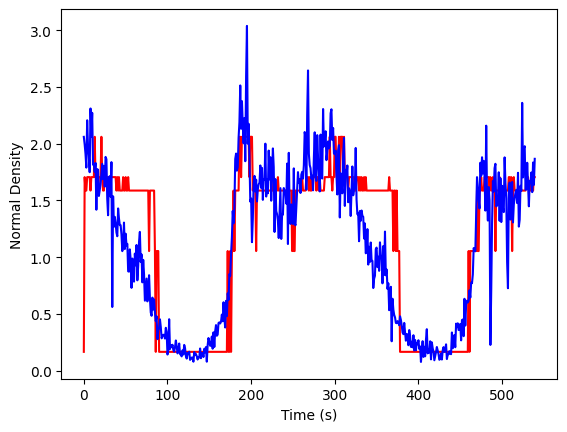

In [24]:
fuzzyinput_col_names=['var1cluster1','var1cluster2','var1cluster3','var1cluster4','var1cluster5',
                      'var2cluster1','var2cluster2','var2cluster3','var2cluster4','var2cluster5',
                      'var3cluster1','var3cluster2','var3cluster3','var3cluster4','var3cluster5',
                      'var4cluster1','var4cluster2','var4cluster3','var4cluster4','var4cluster5',
                     'outputvalue']
x=[]
f = open("cluster_dct.txt", "w")
f.write(str(num_input))
f.write(str(output_cluster))
f.write("\n")
f.close()

fd = open("mf_dct.txt", "w")
fd.close()

for i in range(num_var):
    initNN(i)

with open('mf_dct.txt', 'r') as f:
    i = f.read().split()
    for elem in i:
        try:
            x.append(float(elem))
        except ValueError:
            pass
print(len(x))

ruleCount=0
rules=[[-1 for i in range(num_var+1)] for j in range(pow(output_cluster,num_var))]

Outmf = [[0 for i in range(discreteSamplePoints)] for j in range(output_cluster+1)]


# Create fuzzytrain_ltsm
temp = np.array([[0.0 for i in range(train_num_line)] for j in range(num_input*output_cluster+1)]).T
# Array to dataframe :
fuzzytrain_ltsm = pd.DataFrame(temp,columns=fuzzyinput_col_names)

# Create fuzzytest_ltsm
temp = np.array([[0.0 for i in range(test_num_line)] for j in range(num_input*output_cluster+1)]).T
# Array to dataframe :
fuzzytest_ltsm = pd.DataFrame(temp,columns=fuzzyinput_col_names)

# Create fuzzytrain_mlp
temp = np.array([[0.0 for i in range(train_num_line)] for j in range(num_input*output_cluster+1)]).T
# Array to dataframe :
fuzzytrain_mlp = pd.DataFrame(temp,columns=fuzzyinput_col_names)

# Create fuzzytest_mlp
temp = np.array([[0.0 for i in range(test_num_line)] for j in range(num_input*output_cluster+1)]).T
# Array to dataframe :
fuzzytest_mlp = pd.DataFrame(temp,columns=fuzzyinput_col_names)


initNN1(x)

In [25]:
fuzzytest_mlp
fuzzytest_mlp_x=fuzzytest_mlp.iloc[:, 0:num_input*output_cluster]
fuzzytest_y=fuzzytest_mlp.iloc[:, num_input*output_cluster]
temp = np.array([[0 for i in range(test_num_line)] for j in range(output_cluster)]).T
for i in range(test_num_line):
#     print(fuzzytest_mlp_y[i])
    temp[i][int(fuzzytest_y[i])]=1
fuzzytest_mlp_y=temp
fuzzytest_mlp_y

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [26]:
fuzzytrain_mlp
fuzzytrain_mlp_x=fuzzytrain_mlp.iloc[:, 0:num_input*output_cluster]
fuzzytrain_y=fuzzytrain_mlp.iloc[:, num_input*output_cluster]
temp = np.array([[0 for i in range(train_num_line)] for j in range(output_cluster)]).T

for i in range(train_num_line):
#     print(fuzzytrain_mlp_y[i])
    temp[i][int(fuzzytrain_y[i])]=1
fuzzytrain_mlp_y=temp
fuzzytrain_mlp_y

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [29]:
fuzzytrain_ltsm

,var1cluster1,var1cluster2,var1cluster3,var1cluster4,var1cluster5,var2cluster1,var2cluster2,var2cluster3,var2cluster4,var2cluster5,...,var3cluster2,var3cluster3,var3cluster4,var3cluster5,var4cluster1,var4cluster2,var4cluster3,var4cluster4,var4cluster5,outputvalue
0,0.0,0.000000,0.037115,1.000000,0.039822,0.586477,0.090566,0.000000,0.000000,0.000000,...,0.991785,0.003179,0.000000,0.000000,0.229789,0.031528,0.000000,0.000000,0.000000,2.0608
1,0.0,0.000000,0.026026,0.928290,0.054357,0.000000,0.000000,0.062270,0.728183,0.128160,...,0.000274,0.063568,0.799871,0.029300,0.000000,0.015003,0.561420,0.271704,0.001453,1.9945
2,0.0,0.000000,0.026026,0.928290,0.054357,0.000000,0.014710,0.358860,0.766253,0.031631,...,0.016427,0.906543,0.114308,0.000000,0.000000,0.043381,0.828253,0.065256,0.000000,1.9118
3,0.0,0.000000,0.026026,0.928290,0.054357,0.000000,0.000008,0.085168,0.841398,0.087919,...,0.009178,0.903291,0.185467,0.000000,0.000000,0.084846,1.000000,0.033172,0.000000,1.7895
4,0.0,0.000000,0.026026,0.928290,0.054357,0.000000,0.000000,0.043573,0.581726,0.215607,...,0.000751,0.137332,1.000000,0.015273,0.000000,0.023583,0.708646,0.148273,0.000000,2.2069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.0,0.011029,0.516058,0.048161,0.000000,0.000000,0.000008,0.085168,0.841398,0.087919,...,0.000000,0.046584,0.640578,0.051094,0.000000,0.007025,0.247741,0.596934,0.004328,1.7468
536,0.0,0.011029,0.516058,0.048161,0.000000,0.000000,0.014710,0.358860,0.766253,0.031631,...,0.000434,0.090138,0.803888,0.019826,0.000000,0.000797,0.142537,0.856010,0.011833,1.5733
537,0.0,0.006526,0.413517,0.070115,0.000000,0.000000,0.040849,0.965634,0.115517,0.007459,...,0.009178,0.903291,0.185467,0.000000,0.000000,0.000797,0.142537,0.856010,0.011833,1.8346
538,0.0,0.006526,0.413517,0.070115,0.000000,0.000000,0.014710,0.358860,0.766253,0.031631,...,0.000000,0.024237,0.380641,0.095664,0.000000,0.000000,0.046935,1.000000,0.029418,1.6378


In [30]:
fuzzytest_ltsm

,var1cluster1,var1cluster2,var1cluster3,var1cluster4,var1cluster5,var2cluster1,var2cluster2,var2cluster3,var2cluster4,var2cluster5,...,var3cluster2,var3cluster3,var3cluster4,var3cluster5,var4cluster1,var4cluster2,var4cluster3,var4cluster4,var4cluster5,outputvalue
0,0.0,0.000000,0.037115,1.000000,0.039822,0.586477,0.090566,0.000000,0.000000,0.000000,...,0.991785,0.003179,0.000000,0.000000,0.229789,0.031528,0.000000,0.000000,0.000000,2.0608
1,0.0,0.000000,0.026026,0.928290,0.054357,0.000000,0.000000,0.062270,0.728183,0.128160,...,0.000274,0.063568,0.799871,0.029300,0.000000,0.015003,0.561420,0.271704,0.001453,1.9945
2,0.0,0.000000,0.026026,0.928290,0.054357,0.000000,0.014710,0.358860,0.766253,0.031631,...,0.016427,0.906543,0.114308,0.000000,0.000000,0.043381,0.828253,0.065256,0.000000,1.9118
3,0.0,0.000000,0.026026,0.928290,0.054357,0.000000,0.000008,0.085168,0.841398,0.087919,...,0.009178,0.903291,0.185467,0.000000,0.000000,0.084846,1.000000,0.033172,0.000000,1.7895
4,0.0,0.000000,0.026026,0.928290,0.054357,0.000000,0.000000,0.043573,0.581726,0.215607,...,0.000751,0.137332,1.000000,0.015273,0.000000,0.023583,0.708646,0.148273,0.000000,2.2069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.0,0.011029,0.516058,0.048161,0.000000,0.000000,0.000008,0.085168,0.841398,0.087919,...,0.000000,0.046584,0.640578,0.051094,0.000000,0.007025,0.247741,0.596934,0.004328,1.7468
536,0.0,0.011029,0.516058,0.048161,0.000000,0.000000,0.014710,0.358860,0.766253,0.031631,...,0.000434,0.090138,0.803888,0.019826,0.000000,0.000797,0.142537,0.856010,0.011833,1.5733
537,0.0,0.006526,0.413517,0.070115,0.000000,0.000000,0.040849,0.965634,0.115517,0.007459,...,0.009178,0.903291,0.185467,0.000000,0.000000,0.000797,0.142537,0.856010,0.011833,1.8346
538,0.0,0.006526,0.413517,0.070115,0.000000,0.000000,0.014710,0.358860,0.766253,0.031631,...,0.000000,0.024237,0.380641,0.095664,0.000000,0.000000,0.046935,1.000000,0.029418,1.6378


In [31]:
fuzzytrain_ltsm.values

array([[0.00000e+00, 0.00000e+00, 3.71150e-02, ..., 0.00000e+00,
        0.00000e+00, 2.06080e+00],
       [0.00000e+00, 0.00000e+00, 2.60260e-02, ..., 2.71704e-01,
        1.45300e-03, 1.99450e+00],
       [0.00000e+00, 0.00000e+00, 2.60260e-02, ..., 6.52560e-02,
        0.00000e+00, 1.91180e+00],
       ...,
       [0.00000e+00, 6.52600e-03, 4.13517e-01, ..., 8.56010e-01,
        1.18330e-02, 1.83460e+00],
       [0.00000e+00, 6.52600e-03, 4.13517e-01, ..., 1.00000e+00,
        2.94180e-02, 1.63780e+00],
       [0.00000e+00, 6.52600e-03, 4.13517e-01, ..., 8.56010e-01,
        1.18330e-02, 1.86700e+00]])

In [32]:
trainX=[]
trainY=[]

n_future=5
n_past=10

for i in range(n_past, len(fuzzytrain_ltsm.values) - n_future +1):
    trainX.append(fuzzytrain_ltsm.values[i - n_past:i, 0:num_input*output_cluster])
    trainY.append(fuzzytrain_ltsm.values[i-1:i, num_input*output_cluster])
#     print("i + n_future-1=",i - 1)
#     print("i + n_future=",i)

trainX, trainY = np.array(trainX), np.array(trainY)
trainY

array([[2.0604],
       [2.2724],
       [1.8156],
       [1.8189],
       [1.7529],
       [1.8305],
       [1.4182],
       [1.7763],
       [1.7703],
       [1.5396],
       [1.5885],
       [1.6422],
       [1.7266],
       [1.8222],
       [1.6876],
       [1.8047],
       [1.622 ],
       [1.8839],
       [1.8634],
       [1.514 ],
       [1.3694],
       [1.7014],
       [1.7146],
       [1.5334],
       [1.8378],
       [0.5602],
       [1.5363],
       [1.2677],
       [1.3552],
       [1.3024],
       [1.2169],
       [1.1843],
       [1.4294],
       [1.3412],
       [1.2825],
       [1.2817],
       [1.2005],
       [1.0529],
       [1.1065],
       [1.3046],
       [1.0714],
       [1.2066],
       [1.1034],
       [1.1172],
       [0.875 ],
       [0.8719],
       [1.0683],
       [0.9769],
       [0.7291],
       [0.9873],
       [0.8605],
       [0.7839],
       [1.031 ],
       [0.9275],
       [1.1071],
       [0.7954],
       [0.9228],
       [1.1358],
       [1.2224

In [33]:
testX=[]
testY=[]

n_future=5
n_past=10

for i in range(n_past, len(fuzzytest_ltsm.values) - n_future +1):
    testX.append(fuzzytest_ltsm.values[i - n_past:i, 0:num_input*output_cluster])
    testY.append(fuzzytest_ltsm.values[i-1:i, num_input*output_cluster])
#     print("i + n_future-1=",i - 1)
#     print("i + n_future=",i)

testX, testY = np.array(testX), np.array(testY)
testY

array([[2.0604],
       [2.2724],
       [1.8156],
       [1.8189],
       [1.7529],
       [1.8305],
       [1.4182],
       [1.7763],
       [1.7703],
       [1.5396],
       [1.5885],
       [1.6422],
       [1.7266],
       [1.8222],
       [1.6876],
       [1.8047],
       [1.622 ],
       [1.8839],
       [1.8634],
       [1.514 ],
       [1.3694],
       [1.7014],
       [1.7146],
       [1.5334],
       [1.8378],
       [0.5602],
       [1.5363],
       [1.2677],
       [1.3552],
       [1.3024],
       [1.2169],
       [1.1843],
       [1.4294],
       [1.3412],
       [1.2825],
       [1.2817],
       [1.2005],
       [1.0529],
       [1.1065],
       [1.3046],
       [1.0714],
       [1.2066],
       [1.1034],
       [1.1172],
       [0.875 ],
       [0.8719],
       [1.0683],
       [0.9769],
       [0.7291],
       [0.9873],
       [0.8605],
       [0.7839],
       [1.031 ],
       [0.9275],
       [1.1071],
       [0.7954],
       [0.9228],
       [1.1358],
       [1.2224

In [34]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(100,activation='relu',return_sequences=True))
model.add(LSTM(100,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           48400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 209,301
Trainable params: 209,301
Non-trainable params: 0
_________________________________________________________________


In [35]:
##TRAINING DATA
history=model.fit(trainX,trainY, epochs=100, batch_size=16,validation_split=0.1,verbose=1)

Epoch 1/100
30/30 [==============================] - 2s 13ms/step - loss: 0.6177 - val_loss: 0.5379
Epoch 2/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0863 - val_loss: 0.2730
Epoch 3/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0719 - val_loss: 0.2053
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0541 - val_loss: 0.2203
Epoch 5/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0492 - val_loss: 0.1607
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0588 - val_loss: 0.1578
Epoch 7/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0548 - val_loss: 0.1943
Epoch 8/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0478 - val_loss: 0.1610
Epoch 9/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0450 - val_loss: 0.1775
Epoch 10/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0527 - val_loss: 0.1873
Epoch 11

30/30 [==============================] - 0s 6ms/step - loss: 0.0230 - val_loss: 0.1467
Epoch 84/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.1674
Epoch 85/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0205 - val_loss: 0.1786
Epoch 86/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.1810
Epoch 87/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0211 - val_loss: 0.1668
Epoch 88/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 0.1564
Epoch 89/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0229 - val_loss: 0.1669
Epoch 90/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0220 - val_loss: 0.1625
Epoch 91/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0226 - val_loss: 0.1620
Epoch 92/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.1560
Epoch 93/100


In [36]:
forecast = model.predict(testX) #forecast
testY.shape

17/17 [==============================] - 0s 2ms/step


(526, 1)


predicted vs actual output
  2.03    2.06
  2.00    2.27
  1.85    1.82
  1.78    1.82
  1.85    1.75
  1.75    1.83
  1.56    1.42
  1.75    1.78
  1.65    1.77
  1.41    1.54
  1.52    1.59
  1.67    1.64
  1.68    1.73
  1.75    1.82
  1.65    1.69
  1.64    1.80
  1.76    1.62
  1.79    1.88
  1.77    1.86
  1.67    1.51
  1.38    1.37
  1.64    1.70
  1.70    1.71
  1.61    1.53
  1.68    1.84
  1.05    0.56
  1.28    1.54
  1.27    1.27
  1.34    1.36
  1.21    1.30
  1.24    1.22
  1.31    1.18
  1.37    1.43
  1.29    1.34
  1.27    1.28
  1.28    1.28
  1.25    1.20
  1.13    1.05
  1.14    1.11
  1.15    1.30
  1.16    1.07
  1.14    1.21
  1.11    1.10
  1.00    1.12
  0.96    0.88
  0.90    0.87
  0.89    1.07
  0.88    0.98
  0.78    0.73
  0.80    0.99
  0.81    0.86
  0.83    0.78
  0.90    1.03
  0.89    0.93
  0.95    1.11
  0.92    0.80
  0.97    0.92
  0.95    1.14
  0.99    1.22
  0.97    0.96
  0.93    1.02
  0.75    0.78
  0.86    0.98
  0.80    0.85
  0.73    0.

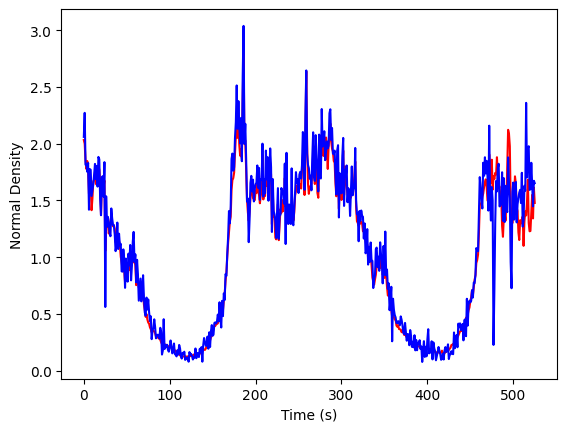

In [37]:
time=[0]*len(forecast)
f = open("result_fuzzyinput_lstm.txt", "w")
    
print("\npredicted vs actual output")
f.write("predicted vs actual output\n")
for i in range(len(forecast)):
    print(" ", '{0:.2f}'.format(forecast[i][0]),"  ",'{0:.2f}'.format(testY[i][0]))
    f.write(str( '{0:.2f}'.format(forecast[i][0])))
    f.write("  ")
    f.write(str('{0:.2f}'.format(testY[i][0])))
    f.write("\n")
    time[i]=i

from matplotlib import pyplot as plt
plt.plot(time, forecast, 'r-')
plt.plot(time, testY, 'b-')
plt.xlabel("Time (s)")
plt.ylabel("Normal Density")
    
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(testY, forecast)
print("RMSE = ",rms)
f.write("RMSE = ")
f.write(str(rms))
TestR2Value = r2_score(testY,forecast)
print("Testing Set R-Square=", TestR2Value)
f.write("R-Square=")
f.write(str(TestR2Value))
f.close()

In [38]:
fuzzyvalue=[0]*len(forecast)
for i in range(len(forecast)):
    temp=0
    index=0
    for j in range(len(outputCluster)):
        if temp == 0:
            temp=abs(forecast[i]-outputCluster[j])
            index=j
        elif abs(forecast[i]-outputCluster[j]) < temp:
            temp=abs(forecast[i]-outputCluster[j])
            index=j
    if j == len(outputCluster)-1:
        fuzzyvalue[i]=outputCluster[index]
#         print(i," cluster",index)
fuzzyvalue

[2.061245,
 2.061245,
 1.705625,
 1.705625,
 1.705625,
 1.705625,
 1.587085,
 1.705625,
 1.705625,
 1.587085,
 1.587085,
 1.705625,
 1.705625,
 1.705625,
 1.705625,
 1.587085,
 1.705625,
 1.705625,
 1.705625,
 1.705625,
 1.587085,
 1.587085,
 1.705625,
 1.587085,
 1.705625,
 1.053655,
 1.053655,
 1.053655,
 1.587085,
 1.053655,
 1.053655,
 1.053655,
 1.587085,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 1.053655,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,
 0.164605,


predicted vs actual output
  2.06    2.06
  2.06    2.27
  1.71    1.82
  1.71    1.82
  1.71    1.75
  1.71    1.83
  1.59    1.42
  1.71    1.78
  1.71    1.77
  1.59    1.54
  1.59    1.59
  1.71    1.64
  1.71    1.73
  1.71    1.82
  1.71    1.69
  1.59    1.80
  1.71    1.62
  1.71    1.88
  1.71    1.86
  1.71    1.51
  1.59    1.37
  1.59    1.70
  1.71    1.71
  1.59    1.53
  1.71    1.84
  1.05    0.56
  1.05    1.54
  1.05    1.27
  1.59    1.36
  1.05    1.30
  1.05    1.22
  1.05    1.18
  1.59    1.43
  1.05    1.34
  1.05    1.28
  1.05    1.28
  1.05    1.20
  1.05    1.05
  1.05    1.11
  1.05    1.30
  1.05    1.07
  1.05    1.21
  1.05    1.10
  1.05    1.12
  1.05    0.88
  1.05    0.87
  1.05    1.07
  1.05    0.98
  1.05    0.73
  1.05    0.99
  1.05    0.86
  1.05    0.78
  1.05    1.03
  1.05    0.93
  1.05    1.11
  1.05    0.80
  1.05    0.92
  1.05    1.14
  1.05    1.22
  1.05    0.96
  1.05    1.02
  1.05    0.78
  1.05    0.98
  1.05    0.85
  1.05    0.

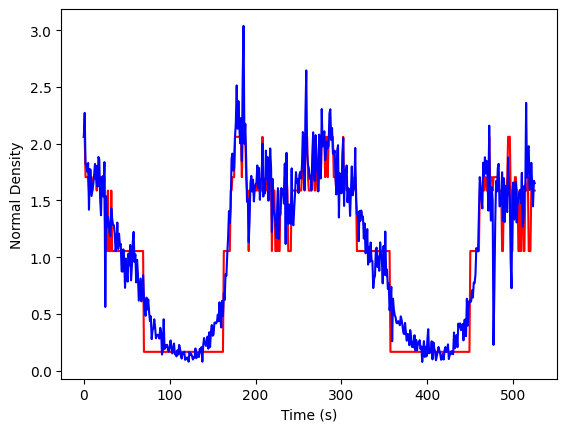

In [39]:
time=[0]*len(forecast)
f = open("result_fuzzy_lstm.txt", "w")
    
print("\npredicted vs actual output")
f.write("predicted vs actual output\n")
for i in range(len(forecast)):
    print(" ", '{0:.2f}'.format(fuzzyvalue[i]),"  ",'{0:.2f}'.format(testY[i][0]))
    f.write(str( '{0:.2f}'.format(fuzzyvalue[i])))
    f.write("  ")
    f.write(str('{0:.2f}'.format(testY[i][0])))
    f.write("\n")
    time[i]=i

from matplotlib import pyplot as plt
plt.plot(time, fuzzyvalue, 'r-')
plt.plot(time, testY, 'b-')
plt.xlabel("Time (s)")
plt.ylabel("Normal Density")
    
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(testY, fuzzyvalue)
print("RMSE = ",rms)
f.write("RMSE = ")
f.write(str(rms))
TestR2Value = r2_score(testY,fuzzyvalue)
print("Testing Set R-Square=", TestR2Value)
f.write("R-Square=")
f.write(str(TestR2Value))
f.close()

In [40]:
outputCluster

[0.164605, 1.053655, 1.587085, 1.705625, 2.061245]

In [41]:
fuzzytest_mlp_y

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [42]:
mlp=Sequential()

mlp.add(Dense(100,input_dim=num_input*output_cluster,activation='relu'))
mlp.add(Dense(100,activation='relu'))
mlp.add(Dense(100,activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(output_cluster,activation='softmax'))
mlp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mlp.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               2100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 505       
                                                                 
Total params: 22,805
Trainable params: 22,805
Non-trainable params: 0
_________________________________________________________________


In [43]:
mlp.fit(fuzzytrain_mlp_x,fuzzytrain_mlp_y.astype(int),batch_size=20,epochs=100,verbose=1)

prediction=mlp.predict(fuzzytest_mlp_x)
prediction

Epoch 1/100
27/27 [==============================] - 0s 654us/step - loss: 1.3841 - accuracy: 0.5241
Epoch 2/100
27/27 [==============================] - 0s 654us/step - loss: 0.8964 - accuracy: 0.6611
Epoch 3/100
27/27 [==============================] - 0s 577us/step - loss: 0.7346 - accuracy: 0.6926
Epoch 4/100
27/27 [==============================] - 0s 577us/step - loss: 0.6823 - accuracy: 0.7148
Epoch 5/100
27/27 [==============================] - 0s 615us/step - loss: 0.6362 - accuracy: 0.7222
Epoch 6/100
27/27 [==============================] - 0s 577us/step - loss: 0.6145 - accuracy: 0.7537
Epoch 7/100
27/27 [==============================] - 0s 577us/step - loss: 0.6008 - accuracy: 0.7093
Epoch 8/100
27/27 [==============================] - 0s 538us/step - loss: 0.6046 - accuracy: 0.7296
Epoch 9/100
27/27 [==============================] - 0s 577us/step - loss: 0.5847 - accuracy: 0.7278
Epoch 10/100
27/27 [==============================] - 0s 577us/step - loss: 0.5585 - accura

array([[2.32145554e-04, 1.88151622e-04, 1.43869640e-03, 2.48134416e-03,
        9.95659649e-01],
       [1.37333072e-05, 4.06714717e-05, 5.19208051e-03, 3.91810685e-02,
        9.55572426e-01],
       [2.60356217e-07, 1.44693320e-06, 1.52028119e-03, 4.58633602e-01,
        5.39844334e-01],
       ...,
       [1.48382693e-04, 2.34631393e-02, 1.16935475e-02, 9.17630553e-01,
        4.70642969e-02],
       [4.98763302e-06, 5.64221045e-05, 3.30617577e-02, 9.65228498e-01,
        1.64838461e-03],
       [2.28018985e-06, 4.42855235e-05, 1.19670453e-02, 9.86884117e-01,
        1.10233657e-03]], dtype=float32)

In [44]:
length=len(prediction)
actualvalue=np.argmax(fuzzytest_mlp_y,axis=1)
predicted=np.argmax(prediction,axis=1)
correct=0
wrong=0
f = open("result_mlp.txt", "w")
for i in range(len(predicted)):
    if predicted[i] == actualvalue[i]:
        print("correct:",predicted[i]," ",actualvalue[i])
        f.write("correct: ")
        f.write(str(predicted[i]))
        f.write(" ")
        f.write(str(predicted[i]))
        f.write("\n")
        correct+=1
    else:
        print("wrong:",predicted[i]," ",actualvalue[i]) 
        f.write("wrong: ")
        f.write(str(predicted[i]))
        f.write(" ")
        f.write(str(actualvalue[i]))
        f.write("\n")
        wrong+=1
            
print("Classification rate:",correct/len(predicted))
f.write("\n")
f.write("Classification rate: ")
f.write(str(correct/len(predicted)))

f.close()

correct: 4   4
correct: 4   4
wrong: 4   3
correct: 3   3
correct: 4   4
correct: 4   4
correct: 3   3
wrong: 4   3
correct: 4   4
correct: 4   4
correct: 4   4
correct: 3   3
correct: 3   3
correct: 3   3
wrong: 2   3
correct: 2   2
wrong: 2   3
correct: 3   3
correct: 2   2
correct: 2   2
correct: 3   3
correct: 3   3
correct: 3   3
correct: 3   3
correct: 3   3
correct: 3   3
correct: 3   3
correct: 3   3
wrong: 3   2
correct: 2   2
correct: 3   3
correct: 3   3
correct: 2   2
correct: 3   3
correct: 1   1
correct: 2   2
correct: 2   2
correct: 2   2
correct: 2   2
correct: 2   2
correct: 2   2
correct: 2   2
correct: 2   2
correct: 2   2
correct: 2   2
correct: 2   2
wrong: 2   1
correct: 1   1
wrong: 1   2
correct: 1   1
correct: 2   2
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
correct: 1   1
wrong: 1 

In [45]:
fuzzytest_ltsm.iloc[:, num_input*output_cluster]

0      2.0608
1      1.9945
2      1.9118
3      1.7895
4      2.2069
        ...  
535    1.7468
536    1.5733
537    1.8346
538    1.6378
539    1.8670
Name: outputvalue, Length: 540, dtype: float64


predicted vs actual output
  2.06    2.06
  2.06    1.99
  2.06    1.91
  1.71    1.79
  2.06    2.21
  2.06    1.98
  1.71    1.89
  2.06    1.75
  2.06    2.31
  2.06    2.06
  2.06    2.27
  1.71    1.82
  1.71    1.82
  1.71    1.75
  1.59    1.83
  1.59    1.42
  1.59    1.78
  1.71    1.77
  1.59    1.54
  1.59    1.59
  1.71    1.64
  1.71    1.73
  1.71    1.82
  1.71    1.69
  1.71    1.80
  1.71    1.62
  1.71    1.88
  1.71    1.86
  1.71    1.51
  1.59    1.37
  1.71    1.70
  1.71    1.71
  1.59    1.53
  1.71    1.84
  1.05    0.56
  1.59    1.54
  1.59    1.27
  1.59    1.36
  1.59    1.30
  1.59    1.22
  1.59    1.18
  1.59    1.43
  1.59    1.34
  1.59    1.28
  1.59    1.28
  1.59    1.20
  1.59    1.05
  1.05    1.11
  1.05    1.30
  1.05    1.07
  1.59    1.21
  1.05    1.10
  1.05    1.12
  1.05    0.88
  1.05    0.87
  1.05    1.07
  1.05    0.98
  1.05    0.73
  1.05    0.99
  1.05    0.86
  1.05    0.78
  1.05    1.03
  1.05    0.93
  1.05    1.11
  1.05    0.

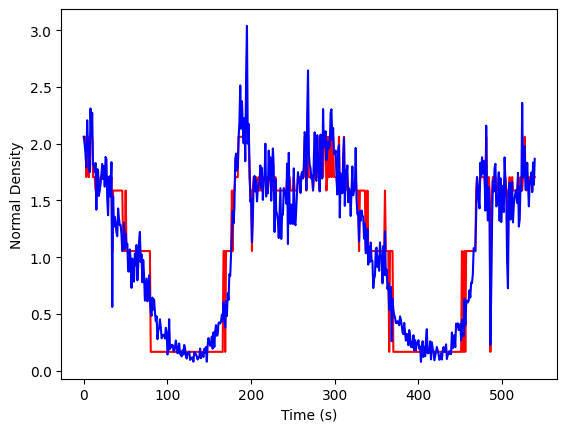

In [46]:
time=[0]*len(prediction)
fuzzyPrediction=[0]*len(prediction)
fuzzyActual=fuzzytest_ltsm.iloc[:, num_input*output_cluster]
f = open("result_fuzzy_mlp.txt", "w")
print("\npredicted vs actual output")
f.write("predicted vs actual output\n")
for i in range(len(prediction)):
    fuzzyPrediction[i]=outputCluster[int(predicted[i])]
    print(" ", '{0:.2f}'.format(fuzzyPrediction[i]),"  ",'{0:.2f}'.format(fuzzyActual[i]))
    f.write(str( '{0:.2f}'.format(fuzzyPrediction[i])))
    f.write("  ")
    f.write(str('{0:.2f}'.format(fuzzyActual[i])))
    f.write("\n")
    time[i]=i

from matplotlib import pyplot as plt
plt.plot(time, fuzzyPrediction, 'r-')
plt.plot(time, fuzzyActual, 'b-')
plt.xlabel("Time (s)")
plt.ylabel("Normal Density")
    
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(fuzzyActual, fuzzyPrediction)
print("RMSE = ",rms)
f.write("RMSE = ")
f.write(str(rms))
TestR2Value = r2_score(fuzzyActual,fuzzyPrediction)
print("Testing Set R-Square=", TestR2Value)
f.write("R-Square=")
f.write(str(TestR2Value))
f.close()